In [23]:
import numpy as np
import pandas as pd

import folium

In [ ]:
!pip install folium

In [24]:
df=pd.read_csv('open_pubs.csv')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51330 entries, 0 to 51329
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   22                                           51330 non-null  int64 
 1   Anchor Inn                                   51330 non-null  object
 2   Upper Street, Stratford St Mary, COLCHESTER  51330 non-null  object
 3   CO7 6LW                                      51330 non-null  object
 4   604749                                       51330 non-null  int64 
 5   234404                                       51330 non-null  int64 
 6   51.970379                                    51330 non-null  object
 7   0.979340                                     51330 non-null  object
 8   Babergh                                      51330 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.5+ MB


In [26]:
df.head()

,22,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER",CO7 6LW,604749,234404,51.970379,0.979340,Babergh
0,36,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh
1,74,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh
2,75,Black Horse,"Lower Street, Stratford St Mary, COLCHESTER",CO7 6JS,622675,-5527598,\N,\N,Babergh
3,76,Black Lion,"Lion Road, Glemsford, SUDBURY",CO10 7RF,622675,-5527598,\N,\N,Babergh
4,97,Brewers Arms,"The Brewers Arms, Bower House Tye, Polstead, C...",CO6 5BZ,598743,240655,52.028694,0.895650,Babergh


In [27]:
df=df.rename(columns={'22':'fsa_id','Anchor Inn':'name','Upper Street, Stratford St Mary, COLCHESTER':'address','CO7 6LW':'postcode','604749':'easting','234404':'northing','51.970379':'latitude','0.979340':'longitude','Babergh':'local_authority'})                        

In [28]:
df.head()

,fsa_id,name,address,postcode,easting,northing,latitude,longitude,local_authority
0,36,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh
1,74,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh
2,75,Black Horse,"Lower Street, Stratford St Mary, COLCHESTER",CO7 6JS,622675,-5527598,\N,\N,Babergh
3,76,Black Lion,"Lion Road, Glemsford, SUDBURY",CO10 7RF,622675,-5527598,\N,\N,Babergh
4,97,Brewers Arms,"The Brewers Arms, Bower House Tye, Polstead, C...",CO6 5BZ,598743,240655,52.028694,0.895650,Babergh


In [29]:
df['latitude'].value_counts()

\N           767
51.310946     10
52.896164     10
53.178189      9
55.318954      8
            ... 
53.100542      1
53.358528      1
54.903580      1
51.306211      1
51.974147      1
Name: latitude, Length: 46809, dtype: int64

In [30]:
df.replace('\\N', np.nan, inplace=True)

In [31]:
df.isnull().sum()

fsa_id               0
name                 0
address              0
postcode             0
easting              0
northing             0
latitude           767
longitude          767
local_authority      0
dtype: int64

In [32]:
df.dropna(inplace=True)


In [33]:
df['local_authority'].value_counts().head(10)


County Durham        680
Leeds                611
Cornwall             557
Wiltshire            544
Kirklees             524
City of Edinburgh    506
Birmingham           494
Buckinghamshire      485
Bradford             478
Northumberland       446
Name: local_authority, dtype: int64

<AxesSubplot:>

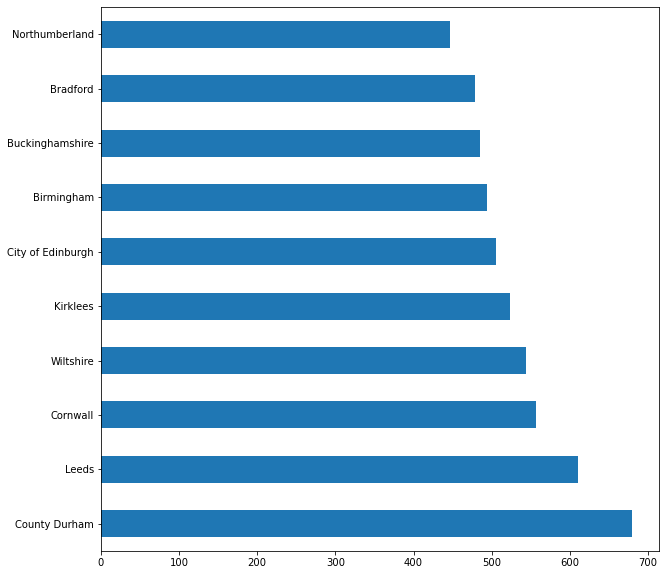

In [34]:


df['local_authority'].value_counts().head(10).plot(kind='barh',figsize=(10,10))


In [35]:
map = folium.Map(location=[51.970379, 0.979340], zoom_start=12)

folium.Marker(location=[51.970379, 0.979340], tooltip='Open Pub' , popup='Anchor Inn').add_to(map)

map

In [36]:
df.to_csv("cleaned.csv", index=False)

In [37]:
df1 = pd.read_csv('cleaned.csv')

In [38]:
df1.head()

,fsa_id,name,address,postcode,easting,northing,latitude,longitude,local_authority
0,36,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh
1,74,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh
2,97,Brewers Arms,"The Brewers Arms, Bower House Tye, Polstead, C...",CO6 5BZ,598743,240655,52.028694,0.895650,Babergh
3,102,Bristol Arms,"Bristol Hill, Shotley, IPSWICH",IP9 1PU,624624,233550,51.955042,1.267642,Babergh
4,122,Caffeine Lounge,"14 Borehamgate Shopping Precinct, King Street,...",CO10 2ED,587527,241247,52.037903,0.732687,Babergh
